# Time Series Metrics and Resampling

## Work By - **RAVJOT SINGH**

E-Mail - ravjot313@gmail.com

Website - https://ravjot03.github.io/

LinkedIn - https://www.linkedin.com/in/ravjot03/

GitHub - https://github.com/Ravjot03

Medium - https://medium.com/@ravjot03

## Table of Contents

---

1  Comparing time series growth rates

1.1 Importing the required libraries

1.2 Google Stock Prices Data

1.21 Loading and Inspecting the data

1.22 Normalizing a single series

1.3 Asset Classes Data

1.31 Loading and Inspecting the data

1.32 Normalizing multiple series

1.4 Microsoft-Apple Data

1.41 Loading and Inspecting the data

1.42 Comparing stock prices with a benchmark

---

2 Changing the time series frequency: Resampling

2.1 Method-1

2.11 Upsampling: quaterly => monthly

2.12 Upsampling: Fill methods

2.2 Method-2

2.21 Add missing values using .reindex()

2.3 US Unemployment Data

2.31 Loading and Inspecting the data

2.32 Upsampling data: Monthly => Weekly

---

3 Upsampling & Interpolation with .resample

3.1 .resample() function

3.11 Loading and Inspecting the data

3.12 Assign frequency with .resample()

3.2 Interpolation

3.21 US Unemployment Data

3.22 Debt-Unemployment Data

3.23 GDP Growth Data

---

4 Downsampling & Aggregation methods

4.1 Ozone Data - NYC

4.2 GDP Growth and DJIA Data

---

Conclusion

---

##1.Comparing time series growth rates

How to compare stock performances ?

Stock prices time series are hard to compare at different levels.

Simple solution is --> To normalize price series to start at 100.

1.  Divide all prices by first in series, then multiply by 100.
2.  All prices will become relative to starting point.
3.  Difference to starting point in percentage points.

###1.1 Importing the required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

###1.2 Google Stock Prices Data

####1.21 Loading and Inspecting the data

In [ ]:
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
google.dropna(axis=0, inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


####1.22 Normalizing a single series

In [ ]:
first_price = google.Close.iloc[0] #selecting the 1st value from the data using .loc() function
first_price

556.0

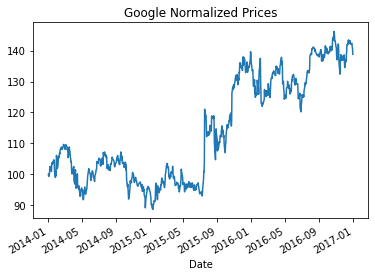

In [ ]:
normalized = google.Close.div(first_price).mul(100)
normalized.plot(title = "Google Normalized Prices")

In [ ]:
normalized.head()

Date
2014-01-02    100.000000
2014-01-03     99.271583
2014-01-06    100.377698
2014-01-07    102.312950
2014-01-08    102.525180
Name: Close, dtype: float64

###1.3 Asset Classes Data

####1.31 Loading and Inspecting the data

In [ ]:
prices = pd.read_csv("asset_classes.csv", parse_dates=['DATE'], index_col='DATE')
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB


####1.32 Normalizing multiple series

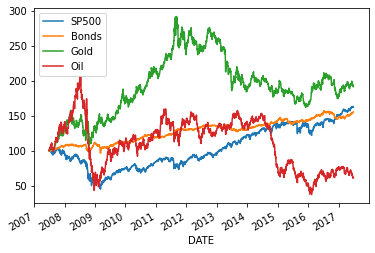

In [ ]:
normalized = prices.div(prices.iloc[0]).mul(100)
normalized.plot()

###1.4 Microsoft-Apple Data (MSFT-AAPL)

####1.41 Loading and Inspecting the data

In [ ]:
stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2007-01-03 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2517 non-null   float64
 1   MSFT    2517 non-null   float64
dtypes: float64(2)
memory usage: 59.0 KB


####1.42 Comparing stock prices with a benchmark

Create the list `tickers` containing the two stock symbols.

In [ ]:
tickers = ['AAPL','MSFT']

Loading the benchmark dataset with which we'll be comparing the stock prices data.

We are comparing the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

In [ ]:
index = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


To concatenate both the datasets along axis=1

In [ ]:
df = pd.concat([stocks, index], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2007-01-03 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2517 non-null   float64
 1   MSFT    2517 non-null   float64
 2   SP500   2395 non-null   float64
dtypes: float64(3)
memory usage: 78.7 KB


Dropping all the missing values.

In [ ]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2394 entries, 2007-06-29 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2394 non-null   float64
 1   MSFT    2394 non-null   float64
 2   SP500   2394 non-null   float64
dtypes: float64(3)
memory usage: 74.8 KB


Plotting the normalized data

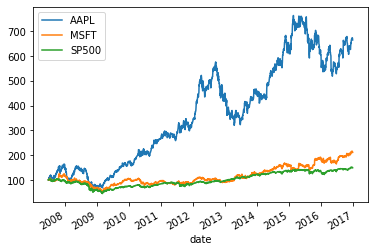

In [ ]:
normalized = df.div(df.iloc[0]).mul(100)
normalized.plot()

Plottig the performance difference 

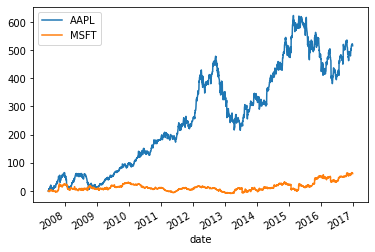

In [ ]:
diff = normalized[tickers].sub(normalized['SP500'],axis=0)
diff.plot()

##2.Changing the time series frequency: Resampling

###2.1 Method-1

Getting started with - Quaterly data

In [ ]:
dates = pd.date_range(start='2020', periods=4, freq='Q')
dates

DatetimeIndex(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'], dtype='datetime64[ns]', freq='Q-DEC')

In [ ]:
data = range(1, 5)

In [ ]:
quaters = pd.Series(data=data, index=dates)
quaters

2020-03-31    1
2020-06-30    2
2020-09-30    3
2020-12-31    4
Freq: Q-DEC, dtype: int64

####2.11 Upsampling:  quaterly -> monthly

Upsampling creates missing values.

In [ ]:
months = quaters.asfreq('M') #Converts to Month-end frequency
months

2020-03-31    1.0
2020-04-30    NaN
2020-05-31    NaN
2020-06-30    2.0
2020-07-31    NaN
2020-08-31    NaN
2020-09-30    3.0
2020-10-31    NaN
2020-11-30    NaN
2020-12-31    4.0
Freq: M, dtype: float64

In [ ]:
months = months.to_frame('data') ##Converting to DataFrame
months

,data
2020-03-31,1.0
2020-04-30,NaN
2020-05-31,NaN
2020-06-30,2.0
2020-07-31,NaN
2020-08-31,NaN
2020-09-30,3.0
2020-10-31,NaN
2020-11-30,NaN
2020-12-31,4.0


####2.12 Upsampling:  Fill Methods

1.  `ffill` - Forward fill
2.  `bfill` - Back fill

In [ ]:
months['ffill'] = quaters.asfreq('M', method='ffill')
months['bfill'] = quaters.asfreq('M', method='bfill')
months['value'] = quaters.asfreq('M', fill_value=0)

In [ ]:
months

,data,ffill,bfill,value
2020-03-31,1.0,1,1,1
2020-04-30,NaN,1,2,0
2020-05-31,NaN,1,2,0
2020-06-30,2.0,2,2,2
2020-07-31,NaN,2,3,0
2020-08-31,NaN,2,3,0
2020-09-30,3.0,3,3,3
2020-10-31,NaN,3,4,0
2020-11-30,NaN,3,4,0
2020-12-31,4.0,4,4,4


###2.2 Method-2

Getting started with - Quaterly data

In [ ]:
dates = pd.date_range(start='2020', periods=4, freq='Q')
quaters = pd.Series(data=range(1,5),index=dates)
quaters = quaters.to_frame('data')
quaters

,data
2020-03-31,1
2020-06-30,2
2020-09-30,3
2020-12-31,4


Converting quaterly to monthly

In [ ]:
monthly = pd.date_range(start='2020', periods=12, freq='M')
monthly

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

####2.21 Add missing values using `.reindex()`

Same filling logic as `.asfreq()`.

In [ ]:
print(quaters.reindex(monthly))
print("")
print("Forward Fill")
print(quaters.reindex(monthly, method='ffill'))
print("")
print("Backward Fill")
print(quaters.reindex(monthly, method='bfill'))

            data
2020-01-31   NaN
2020-02-29   NaN
2020-03-31   1.0
2020-04-30   NaN
2020-05-31   NaN
2020-06-30   2.0
2020-07-31   NaN
2020-08-31   NaN
2020-09-30   3.0
2020-10-31   NaN
2020-11-30   NaN
2020-12-31   4.0

Forward Fill
            data
2020-01-31   NaN
2020-02-29   NaN
2020-03-31   1.0
2020-04-30   1.0
2020-05-31   1.0
2020-06-30   2.0
2020-07-31   2.0
2020-08-31   2.0
2020-09-30   3.0
2020-10-31   3.0
2020-11-30   3.0
2020-12-31   4.0

Backward Fill
            data
2020-01-31     1
2020-02-29     1
2020-03-31     1
2020-04-30     2
2020-05-31     2
2020-06-30     2
2020-07-31     3
2020-08-31     3
2020-09-30     3
2020-10-31     4
2020-11-30     4
2020-12-31     4


###2.3 US Unemployment Data

The civilian US unemployment rate is reported monthly. We have time series data for last 20 years.

####2.31 Loading and Inspecting the data

In [ ]:
unrate = pd.read_csv('unrate_2000.csv', parse_dates=['date'], index_col = 'date')
unrate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [ ]:
unrate.head()

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


####2.32 Upsampling data: Monthly -> Weekly

Creating weekly data from monthly unemployment data

In [ ]:
unrate_weekly = unrate.asfreq('W', method='ffill')
unrate_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 905 entries, 2000-01-02 to 2017-04-30
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  905 non-null    float64
dtypes: float64(1)
memory usage: 14.1 KB


In [ ]:
unrate_weekly.head()

,UNRATE
date,
2000-01-02,4.0
2000-01-09,4.0
2000-01-16,4.0
2000-01-23,4.0
2000-01-30,4.0


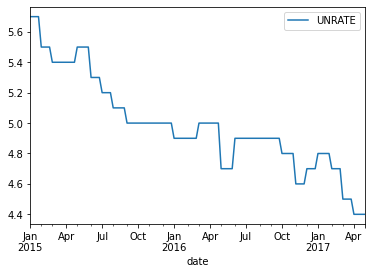

In [ ]:
unrate_weekly.loc['2015': ].plot()

##3.Upsampling & Interpolation with `.resample`

###3.1 `.resample() function`

1.  `.resample()` is similar to `.groupby()`
2.  Pandas `.resample()` function is primarily used for time series data.
3.  Groups data within resampling period and applies one or several methods to each group.

####3.11 Loading and Inspecting the data

In [ ]:
unrate = pd.read_csv('unrate_2000.csv', parse_dates=['date'], index_col='date')
unrate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [ ]:
unrate.head()

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


####3.12 Assign frequency with `.resample()`

In [ ]:
unrate.asfreq('MS').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [ ]:
unrate.resample('MS').asfreq().info()  #Creates resamople object

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [ ]:
unrate.asfreq('MS').equals(unrate.resample('MS').asfreq())

True

###3.2 Interpolation

Pandas `.interpolate()` function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value.

####3.21 US Unemployment Data

Loading and Inspecting the data

In [ ]:
unrate = pd.read_csv('unrate_2000.csv', parse_dates=['date'], index_col='date')
print(unrate.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 905 entries, 2000-01-02 to 2017-04-30
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  30 non-null     float64
dtypes: float64(1)
memory usage: 14.1 KB
None


Changing the time series frequency to weekly

In [ ]:
unrate = unrate.asfreq('W')
print(unrate.info())

In [ ]:
unrate['ffill'] = unrate.UNRATE.ffill() #Applying .ffill() method 
unrate['interpolate'] = unrate.UNRATE.interpolate()  #Applying .interpolate()

Plotting the Data

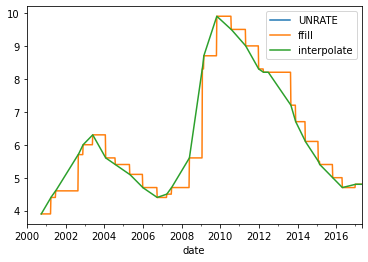

In [ ]:
unrate.plot()
plt.show()

####3.22 Debt-Unemployment Data

Loading and Inspecting the data

In [ ]:
df = pd.read_csv('debt_unemployment.csv', parse_dates=['date'], index_col='date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB


Applying `.interpolate()` to fill null values 

In [ ]:
interpolated = df.interpolate()
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB


Plotting the Data

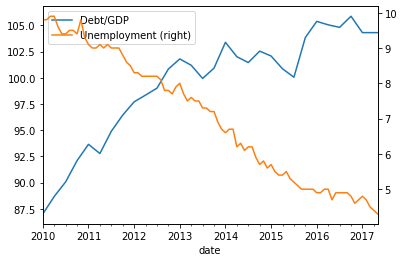

In [ ]:
interpolated.plot(secondary_y = 'Unemployment')
plt.show()

####3.23 GDP Growth Data

Loading and Inspecting the data

In [ ]:
gdp = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


Resampling data with `asfreq` as `'MS'` and applying `.ffill()` method on missing values.

In [ ]:
gdp1 = gdp.resample('MS').ffill().add_suffix('_ffill')
gdp1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2007-01-01 to 2017-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gdp_growth_ffill  121 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [ ]:
gdp1.head()

,gdp_growth_ffill
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2
2007-04-01,3.1
2007-05-01,3.1


Resampling data with `asfreq` as `'MS'` and applying `.interpolate()` method on missing values.

`.interpolate()` -- finds points on the straight line between existing data.

In [ ]:
gdp2 = gdp.resample('MS').interpolate().add_suffix('_interpolate')
gdp2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2007-01-01 to 2017-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gdp_growth_interpolate  121 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [ ]:
gdp2.head()

,gdp_growth_interpolate
date,
2007-01-01,0.200000
2007-02-01,1.166667
2007-03-01,2.133333
2007-04-01,3.100000
2007-05-01,2.966667


Concatenating both the resampled datasets - `gdp1` and `gdp2` along the `axis=1`.

In [ ]:
gdp3 = pd.concat([gdp1, gdp2], axis=1)
gdp3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2007-01-01 to 2017-01-01
Freq: MS
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gdp_growth_ffill        121 non-null    float64
 1   gdp_growth_interpolate  121 non-null    float64
dtypes: float64(2)
memory usage: 7.8 KB


Plotting the combined dataset

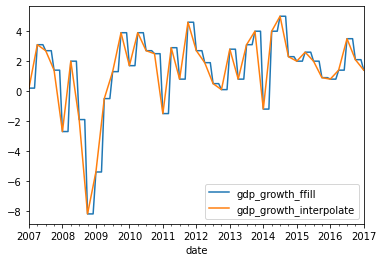

In [ ]:
gdp3.plot()
plt.show()

Slicing data for year `2015` and then plotting

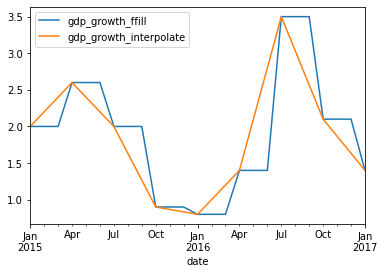

In [ ]:
gdp3.loc['2015':].plot()
plt.show()

##4.Downsampling & Aggregation methods

###4.1 Ozone Data NYC

Loading and Inspecting the data

In [ ]:
ozone = pd.read_csv("ozone_nyc.csv", parse_dates=['date'], index_col='date')
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


Resampling ozone data as daily.

In [ ]:
ozone.resample('D').asfreq().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


Creating weekly ozone data - `ozone_w`

In [ ]:
ozone_w = ozone.resample('W').mean()
ozone_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 901 entries, 2000-01-02 to 2017-04-02
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   901 non-null    float64
dtypes: float64(1)
memory usage: 14.1 KB


In [ ]:
ozone_w.head()

,Ozone
date,
2000-01-02,0.006759
2000-01-09,0.008237
2000-01-16,0.012210
2000-01-23,0.012002
2000-01-30,0.011995


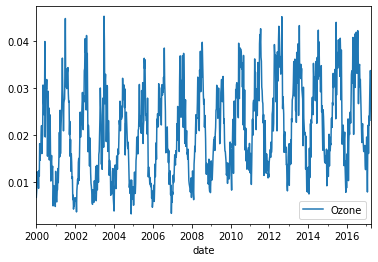

In [ ]:
ozone_w.plot()
plt.show()

Creating monthly ozone data - `ozone_m`

In [ ]:
ozone_m = ozone.resample('M').mean()
ozone_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2000-01-31 to 2017-03-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   207 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [ ]:
ozone_m.head()

,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


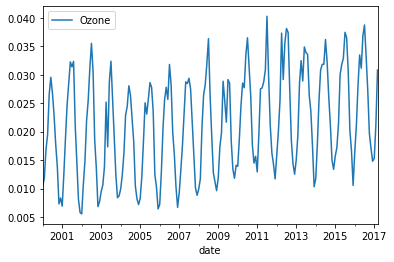

In [ ]:
ozone_m.plot()
plt.show()

Creating annually ozone data - `ozone_a`

In [ ]:
ozone_a = ozone.resample('A').mean()
ozone_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2000-12-31 to 2017-12-31
Freq: A-DEC
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   18 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes


In [ ]:
ozone_a.head()

,Ozone
date,
2000-12-31,0.017821
2001-12-31,0.019622
2002-12-31,0.018557
2003-12-31,0.017583
2004-12-31,0.017236


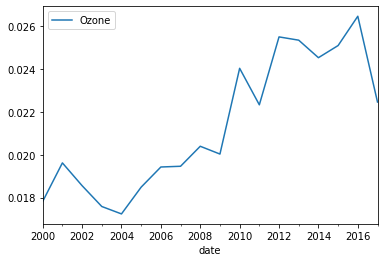

In [ ]:
ozone_a.plot()
plt.show()

Plotting resampled ozone data

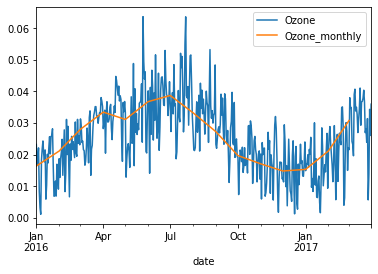

In [ ]:
ozone1 = ozone.loc['2016':] #Slicing data from year 2016 onwards
ax = ozone1.plot()

ozone1_m = ozone1.resample('M').mean()
ozone1_m.add_suffix('_monthly').plot(ax=ax)

Aggregating `mean` and `std` statistics from monthly resampled data in `ozone2`.

In [ ]:
ozone2 = ozone.resample('M').agg(['mean','std'])
ozone2.head()

Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409

Visualizing monthly mean and standard deviation of Ozone levels in NYC.

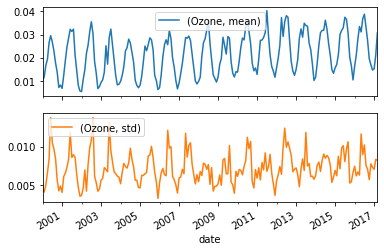

In [ ]:
ozone2.plot(subplots=True)
plt.show()

###4.2 GDP Growth and DJIA Data

DJIA (Dow Jones Industrial Average) - Index of 30 large US stocks.

Loading and Inspecting the data

In [ ]:
gdp = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp.info())
print(gdp.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
            gdp_growth
date                  
2007-01-01         0.2
2007-04-01         3.1
2007-07-01         2.7
2007-10-01         1.4
2008-01-01        -2.7


Loading and Inspecting the Data

In [ ]:
djia = pd.read_csv('djia.csv', parse_dates=['date'], index_col='date')
print(djia.info())
print(djia.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None
                djia
date                
2007-06-29  13408.62
2007-07-02  13535.43
2007-07-03  13577.30
2007-07-04       NaN
2007-07-05  13565.84


Resampling `djia` data using frequency alias `QS` and aggregating using `.first()` and assigning the result to `djia_quaterly`.

In [ ]:
djia_quaterly = djia.resample('QS').first()
print(djia_quaterly)

                djia
date                
2007-04-01  13408.62
2007-07-01  13535.43
2007-10-01  14087.55
2008-01-01  13043.96
2008-04-01  12654.36
2008-07-01  11382.26
2008-10-01  10831.07
2009-01-01   9034.69
2009-04-01   7761.60
2009-07-01   8504.06
2009-10-01   9509.28
2010-01-01  10583.96
2010-04-01  10927.07
2010-07-01   9732.53
2010-10-01  10829.68
2011-01-01  11670.75
2011-04-01  12376.72
2011-07-01  12582.77
2011-10-01  10655.30
2012-01-01  12397.38
2012-04-01  13264.49
2012-07-01  12871.39
2012-10-01  13515.11
2013-01-01  13412.55
2013-04-01  14572.85
2013-07-01  14974.96
2013-10-01  15191.70
2014-01-01  16441.35
2014-04-01  16532.61
2014-07-01  16956.07
2014-10-01  16804.71
2015-01-01  17832.99
2015-04-01  17698.18
2015-07-01  17757.91
2015-10-01  16272.01
2016-01-01  17148.94
2016-04-01  17792.75
2016-07-01  17949.37
2016-10-01  18253.85
2017-01-01  19881.76
2017-04-01  20650.21


In [ ]:
djia_quaterly_return = djia_quaterly.pct_change().mul(100) #To obtain percent change b/w 2 adjacent values

Concatenating `gdp` and `djia_quaterly_return` datasets along `axis=1`.

`axis=1` -- concatenate horizontally.

In [ ]:
df = pd.concat([gdp, djia_quaterly_return], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2007-01-01 to 2017-04-01
Freq: QS-OCT
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
 1   djia        40 non-null     float64
dtypes: float64(2)
memory usage: 1008.0 bytes


In [ ]:
df.columns = ['gdp', 'djia']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2007-01-01 to 2017-04-01
Freq: QS-OCT
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gdp     41 non-null     float64
 1   djia    40 non-null     float64
dtypes: float64(2)
memory usage: 1008.0 bytes


Plotting the data

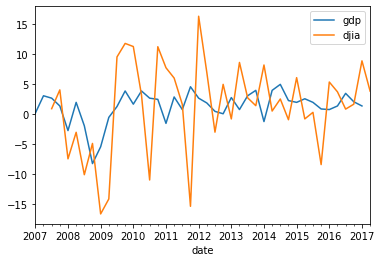

In [ ]:
df.plot()
plt.show()

## Conclusion

In this jupyter notebook, we have learnt about how to compare different time series by normalizing their start points. After that we have learnt about resampling and its types.